In [1]:
import keras as tf

In [2]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [5]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
xtrain = xtrain/255
xtest = xtest/255

In [7]:
model = tf.models.Sequential()

model.add(tf.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
model.add(tf.layers.MaxPool2D((2,2)))

model.add(tf.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(tf.layers.MaxPool2D((2,2)))

model.add(tf.layers.Flatten())   ## input layer

model.add(tf.layers.Dense(64,activation = "relu"))   ## hidden layer

model.add(tf.layers.Dense(10,activation="softmax"))   ## output layer

## compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [8]:
hist = model.fit(xtrain,ytrain,epochs=10,batch_size=512,validation_data=(xtest,ytest))

Epoch 1/10
118/118 [==============================] - 11s 18ms/step - loss: 0.4807 - accuracy: 0.8681 - val_loss: 0.1233 - val_accuracy: 0.9634
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1035 - accuracy: 0.9696 - val_loss: 0.0812 - val_accuracy: 0.9749
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0714 - accuracy: 0.9785 - val_loss: 0.0586 - val_accuracy: 0.9813
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0567 - accuracy: 0.9838 - val_loss: 0.0467 - val_accuracy: 0.9848
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0412 - accuracy: 0.9879 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0347 - val_accuracy: 0.988

In [9]:
import matplotlib.pyplot as plt

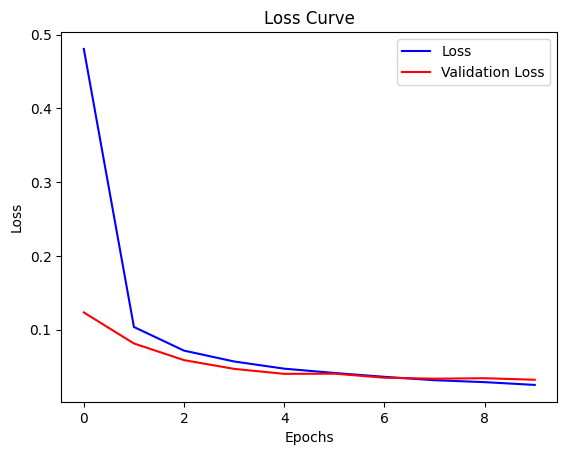

In [10]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.plot(hist.history['loss'],color="blue",label="Loss")
plt.plot(hist.history['val_loss'],color="red",label="Validation Loss")
plt.legend()
plt.show()

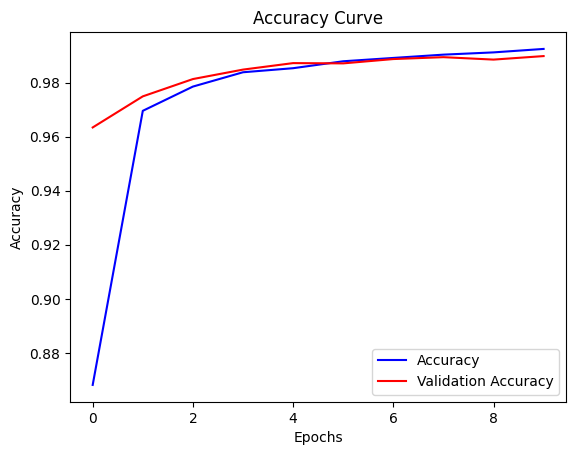

In [11]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.plot(hist.history['accuracy'],color="blue",label="Accuracy")
plt.plot(hist.history['val_accuracy'],color="red",label="Validation Accuracy")
plt.legend()
plt.show()

In [18]:
import cv2
import numpy as np

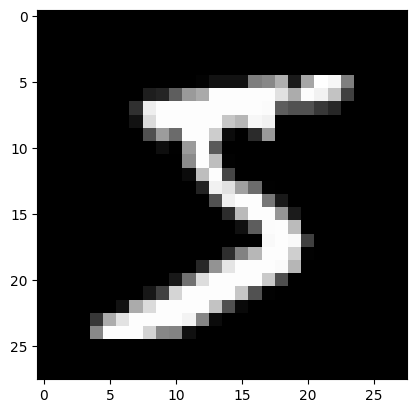

In [26]:
plt.imshow(xtrain[0],cmap="gray");

(28, 28)
1/1 [==============================] - 0s 42ms/step
Predicted Digit: 2


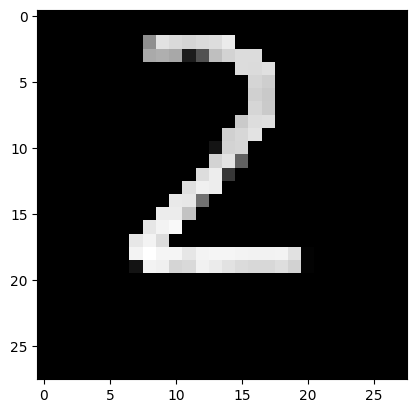

In [29]:
img = cv2.imread("/content/2.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = img.reshape((28,28,1))
img = cv2.bitwise_not(img)
img = img/255
print(img.shape)
print("Predicted Digit:",np.argmax(model.predict(np.array([img]))))
plt.imshow(img,cmap="gray")
plt.show()

(28, 28)
1/1 [==============================] - 0s 53ms/step
Predicted Digit: 3


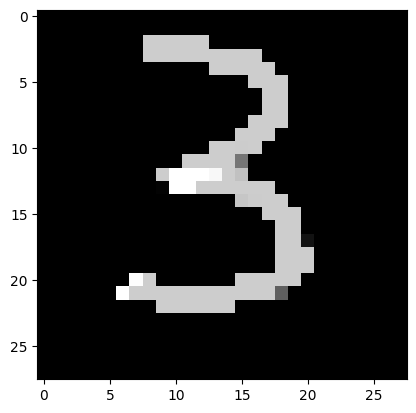

In [28]:
img = cv2.imread("/content/3.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
img = img/255
print(img.shape)
print("Predicted Digit:",np.argmax(model.predict(np.array([img]))))
plt.imshow(img,cmap="gray")
plt.show()